<a href="https://colab.research.google.com/github/Hong-gi-young/Projects/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,892 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

In [ ]:
import pandas as pd #판다스 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model as lm
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

#시각화 한글 폰트
plt.rc('font', family='NanumBarunGothic')

#경고메세지 숨김
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/따릉이데이터/train.csv', sep=',')
test = pd.read_csv('/content/drive/MyDrive/따릉이데이터/test.csv', sep=',')
submission = pd.read_csv('/content/drive/MyDrive/따릉이데이터/submission.csv', sep=',')

# del train['id']
# del test['id']

Mounted at /content/drive


In [ ]:
pd.options.display.max_rows=200
train_na = train[train['hour_bef_pm2.5'].isna()]
train_na

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0
129,193,19,27.0,0.0,3.6,39.0,2000.0,0.047,NaN,NaN,319.0
140,206,10,18.2,0.0,2.4,60.0,527.0,NaN,NaN,NaN,66.0
142,208,1,18.8,0.0,1.1,61.0,2000.0,NaN,NaN,NaN,62.0
147,220,1,18.4,0.0,3.1,31.0,2000.0,NaN,NaN,NaN,63.0
158,234,1,15.3,0.0,1.4,77.0,1542.0,NaN,NaN,NaN,41.0


## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


In [ ]:
train.head()
train.shape

(1459, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


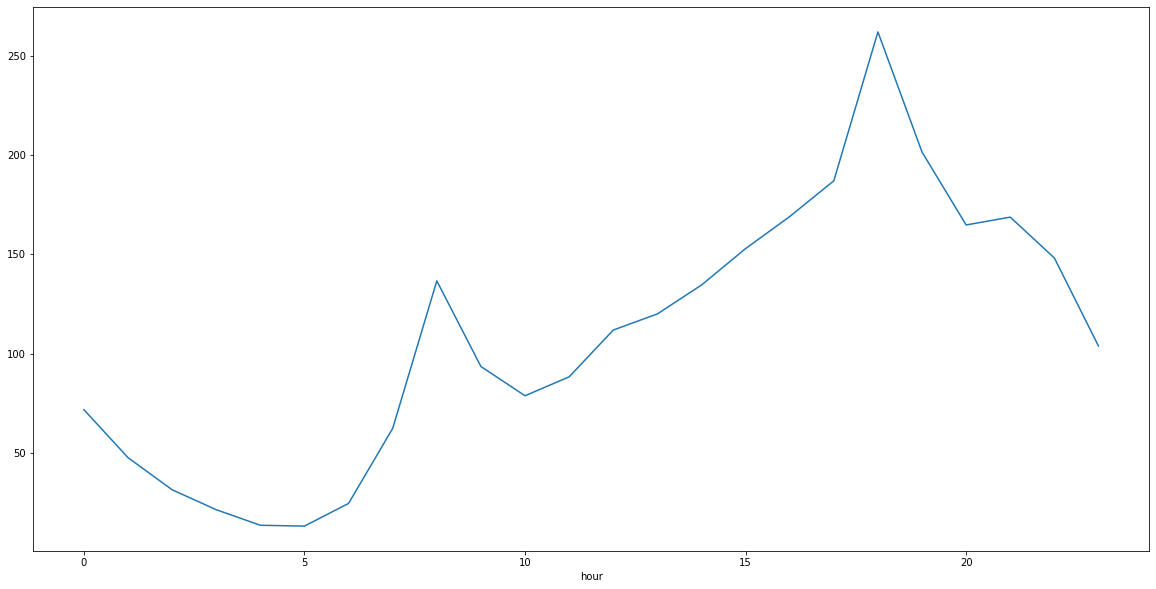

In [ ]:
#출퇴근 시간에 따릉이의 수요가 증가하는 걸 볼수 있다. 특히 퇴근시간에 수요가 높다.
plt.figure(figsize=(20,10))
train.groupby('hour')['count'].mean().plot()

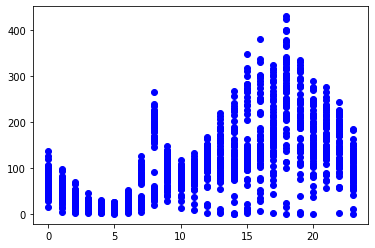

In [ ]:
plt.plot('hour', 'count', 'bo', data = train)

In [ ]:
# 17~18시 사이에 수요가 15992로 가장 많은 건수를 기록했다.
# 시간별로 주기성을 보이고 있다.
# 아침 7~8시 사이에 단기적으로 수요가 급증
result = pd.DataFrame(train.groupby('hour').agg({'count':['count','sum']}))
result.transpose()

hour             0       1       2       3   ...       20       21      22      23
count count    60.0    61.0    61.0    61.0  ...     61.0     60.0    61.0    61.0
      sum    4306.0  2904.0  1916.0  1304.0  ...  10057.0  10129.0  9043.0  6335.0

[2 rows x 24 columns]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


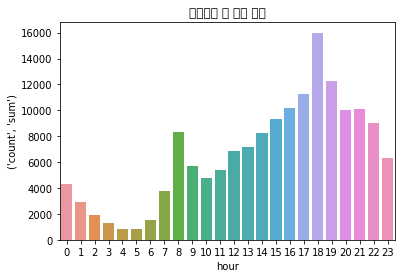

In [ ]:
sns.barplot(x=result.index, y = result.iloc[:,-1], data=result)
plt.title('시간대별 총 수요 합계')
plt.show()

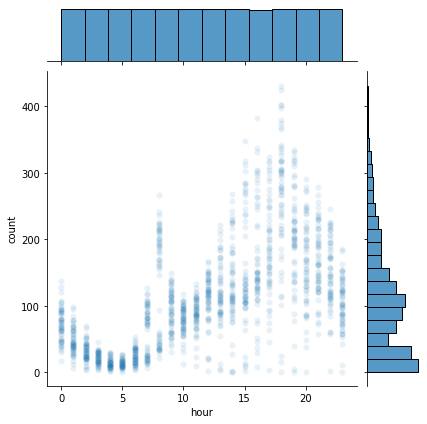

In [ ]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

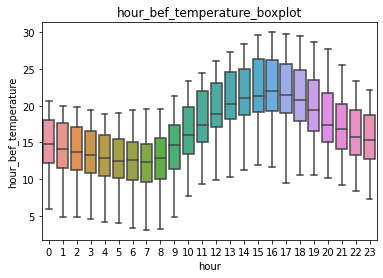

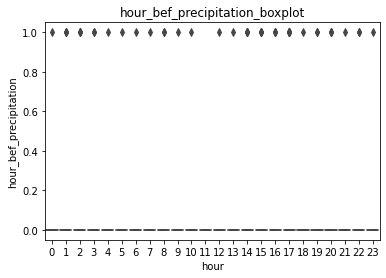

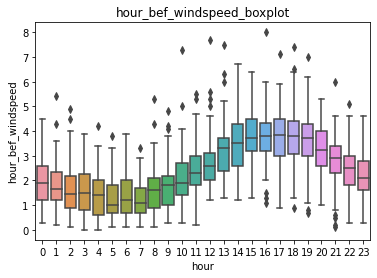

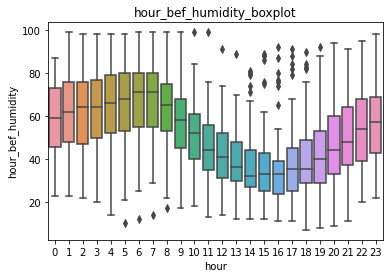

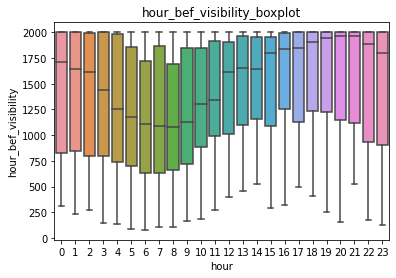

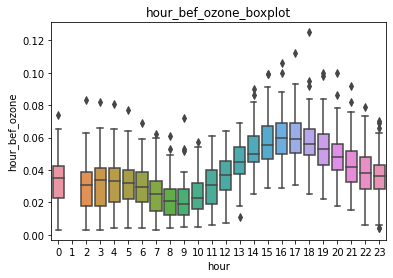

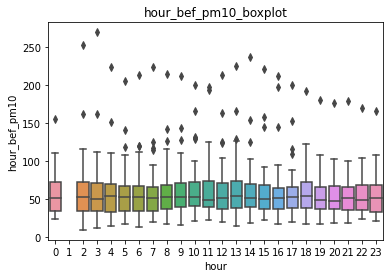

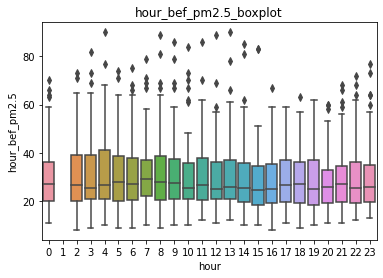

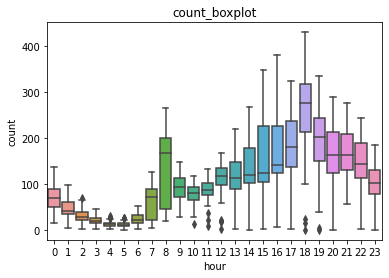

In [ ]:
for col in [ col for col in train.iloc[:,2:].columns.to_list()]:
  sns.boxplot(x='hour', y=col, data=train)
  plt.title('%s_boxplot'%col)
  plt.show()

In [ ]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


### 상관계수

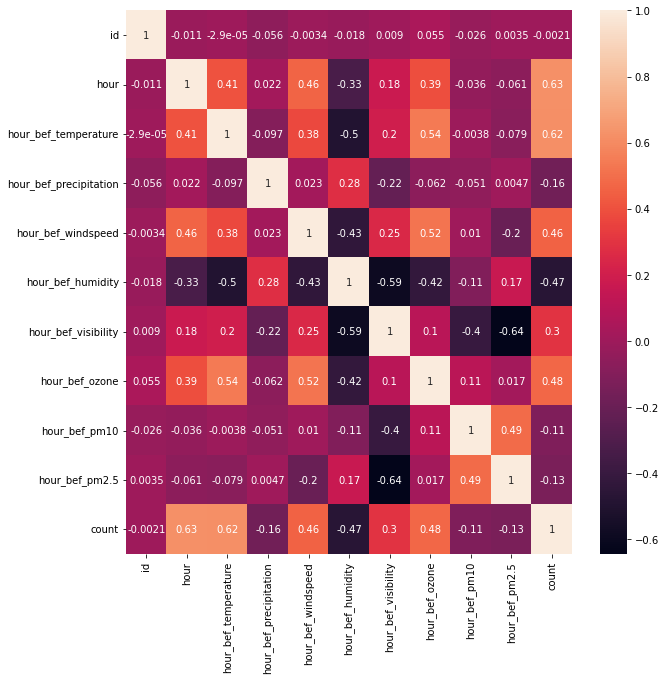

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [ ]:
#산점도로 분포 확인
# sns.pairplot(train.iloc[:,2:])

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### 결측치 예측 처리

In [ ]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train[train['hour_bef_ozone'].isna()].head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0


#### hour_bef_precipitation은 제외한 변수들은 평균값으로 대체

In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
def nan_mean_fill(dataset):
  #결측치가 있는 컬럼
  nan_columns = [col for col in dataset.iloc[:,2:-1].columns.to_list() if col!='hour_bef_precipitation' and col!='hour_bef_ozone' and col!='hour_bef_pm10' and col!='hour_bef_pm2.5']

  #for 문을 통해 결측치를 각 시간대별 평균값으로 대체
  for col in nan_columns:
    hour_mean_value = dataset.groupby('hour').mean()[col]
    hour_mean_value.fillna(hour_mean_value.mean(),inplace=True) #회귀를 통해서 값 채우기 시도

    for nan_hour in dataset[dataset[col].isna()]['hour'].unique():
      
      #nan index 구하기
      index= dataset[dataset[col].isna()].loc[dataset['hour']==nan_hour,col].index

      #채우기 
      for idx in index:
        dataset.loc[idx, col] = hour_mean_value[nan_hour]
        
  print(dataset.isna().sum())
  return dataset

train = nan_mean_fill(train)
test= nan_mean_fill(test)

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


#### Classfication을 이용한 hour_bef_precipitation 결측값 처리

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#x,y 분리
precipitation_x_del = pd.concat([train,test], axis=0).iloc[:,1:-4].dropna()
cls_x_train = precipitation_x_del[[col for col in precipitation_x_del.columns if col!='hour_bef_precipitation']]
cls_y_train =precipitation_x_del['hour_bef_precipitation']

#data split
cls_X_train, cls_X_val, cls_Y_train, cls_Y_test = train_test_split(cls_x_train, cls_y_train, test_size = 0.3, shuffle = True, random_state = 2021)

# model fit
cls_model = LogisticRegression()
cls_model.fit(cls_X_train, cls_Y_train)

#predict
y_pred = pd.Series(cls_model.predict(cls_X_val))

# model evaluation
print("Accuracy:", metrics.accuracy_score(cls_Y_test, y_pred))

Accuracy: 0.9662576687116564


In [ ]:
# 불필요한 변수 제거
hour_bef_precipitation_train_df = train[train['hour_bef_precipitation'].isna()].iloc[:,1:-4]
del hour_bef_precipitation_train_df['hour_bef_precipitation']
display(hour_bef_precipitation_train_df)

hour_bef_precipitation_test_df = test[test['hour_bef_precipitation'].isna()].iloc[:,1:-3]
del hour_bef_precipitation_test_df['hour_bef_precipitation']
display(hour_bef_precipitation_test_df)

#predict -> 비가 오지 않음(0) 
print(cls_model.predict(hour_bef_precipitation_train_df))
print(cls_model.predict(hour_bef_precipitation_test_df))

# 결측값 0으로 채우기
train['hour_bef_precipitation'].fillna({934:0, 1035:0}, inplace=True)
print(train.isna().sum())

test['hour_bef_precipitation'].fillna({653:0}, inplace=True)
print(test.isna().sum())

#predict -> 비가 오지 않음(0) 
print('train의 hour_bef_precipitation 예측값:',cls_model.predict(hour_bef_precipitation_train_df))
print("train의 hour_bef_precipitation 예측값:",cls_model.predict(hour_bef_precipitation_test_df))

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
934,0,14.788136,1.965517,58.169492,1434.220339
1035,18,20.926667,3.838333,40.450000,1581.850000


,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
653,19,26.110345,3.541379,47.689655,1561.758621


[0. 0.]
[0.]
id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64
train의 hour_bef_precipitation 예측값: [0. 0.]
train의 hour_bef_precipitation 예측값: [0.]


In [ ]:
"""
train/test 데이터 만들기 - > train + test 합친 후 train_test_split으로 성능평가
그리드 서치로 적합한 모델 및 파라미터 설정
hour_bef_ozone	hour_bef_pm10	hour_bef_pm2.5의 결측치 id를 활용하여 추출한 후 predict 
feature들의 결측값은 제거
"""

'\ntrain/test 데이터 만들기 - > train + test 합친 후 train_test_split으로 성능평가\n그리드 서치로 적합한 모델 및 파라미터 설정\nhour_bef_ozone\thour_bef_pm10\thour_bef_pm2.5의 결측치 id를 활용하여 추출한 후 predict \nfeature들의 결측값은 제거\n'

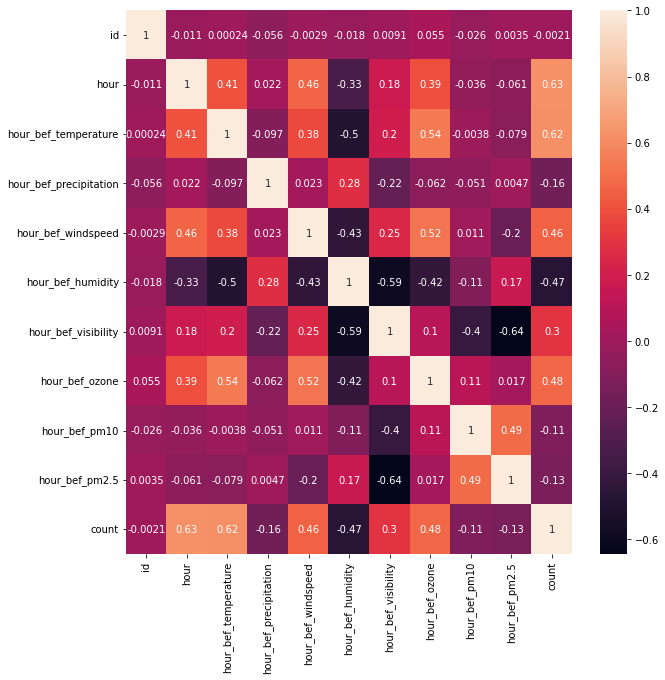

In [ ]:
# hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 와 다른 변수 간의 상관관계 확인
# hour_bef_pm10 -> visibility
# hour_bef_pm2.5 -> visibility, hour_bef_pm10  이외에는 상관도가 낮음
# hour_bef_ozone - > temper, windspeed, humidity
# train.sort_values(by='hour',ascending=True)

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [ ]:
def evaluate(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  mape= np.mean(np.abs((y_true-y_pred)/y_true))*100
  mae= mean_absolute_error(y_true,y_pred)
  mse= mean_squared_error(y_true,y_pred)
  score = pd.DataFrame([mape, mae, mse], index=['mape','mae','mse'], columns=['score']).transpose()
  return score

#### hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 결측값 최종예측

In [ ]:
def Nan_prediction(targets):
  # train 데이터 만들기
  for target in targets:
    if target =='hour_bef_pm2.5':
       use_columns = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation','hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility','hour_bef_pm10',target]
    else:
      use_columns = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation','hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',target]

    #feature, target data split
    without_isna = pd.concat([train,test],axis=0).loc[:,use_columns].dropna()
    X_feature = without_isna.iloc[:,:-1]
    Y_train = without_isna[target]

    X_train, X_test, Y_train, Y_test = train_test_split(X_feature,Y_train, test_size=0.3, random_state=2021)

    # 원본 train data 안에 nan 값에 해당하는 Feature 추출 
    target_isna_train_df= train[train[target].isna()]

    # 원본 test data 안에 nan 값에 해당하는 Feature 추출
    target_isna_test_df= test[test[target].isna()]

    models = [
        ('ridge', lm.Ridge()),
        ('lasso', lm.Lasso()),
        ('elastic', lm.ElasticNet()),
        ('LassoLars', lm.LassoLars()),
        ('SGDRegressor', lm.SGDRegressor()),
        ('knn', KNeighborsRegressor(n_jobs = -1)),
    ]

    params = {
        'ridge': {
            'alpha': [0.01, 0.1, 1.0, 10, 100],
            'fit_intercept': [True, False],
            'normalize': [True, False],
        },
        'lasso': {
            'alpha': [0.1, 1.0, 10],
            'fit_intercept': [True, False],
            'normalize': [True, False],
        },
        'elastic': {
            'alpha': [0.1, 1.0, 10],
            'normalize': [True, False],
            'fit_intercept': [True, False],
        },
            'LassoLars': {
            'alpha': [0.1, 1.0, 10],
            'normalize': [True, False],
            'fit_intercept': [True, False],
        },
        'SGDRegressor': {
            'penalty': ['l1', 'l2'],
            'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
            'fit_intercept': [True, False],
        },
        'knn': {
            "n_neighbors": range(2,7),
        }
    }
    
    #target 별 상관성이 상대적으로 낮은 변수들 제외하기 위한 x_colname 정의
    hour_bef_ozone_x_colname = [col for col in X_train.columns if col != 'hour_bef_precipitation' and col != 'hour_bef_ozone' and col != 'hour_bef_pm10' and col != 'hour_bef_pm2.5']
    hour_bef_pm10_x_colname =['hour_bef_humidity','hour_bef_visibility']
    hour_bef_pm25_x_colname = ['hour_bef_humidity','hour_bef_visibility','hour_bef_pm10'] 

    if target =="hour_bef_ozone":
      x_colname = hour_bef_ozone_x_colname
    elif target =="hour_bef_pm10":
      x_colname = hour_bef_pm10_x_colname
    else:
      x_colname = hour_bef_pm25_x_colname

    best_model, best_score = None, float('inf')
    for model_name, model in models:
        param_grid = params[model_name]
        grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(X_train[x_colname], Y_train)

        model = grid.best_estimator_
        predictions = model.predict(X_test[x_colname])

        evaluation = evaluate(Y_test, predictions)
        score = evaluation['mse'][0]
        print(model_name, score)

        if score < best_score:
            best_score=score
            best_model = model

    print("최적의 모델:",best_model)
    print("최종 mse score:",best_score,"\n")
    best_model = grid.best_estimator_
    best_train_pred = best_model.predict(target_isna_train_df[x_colname])
    best_test_pred = best_model.predict(target_isna_test_df[x_colname])

    # 예측값을 train,test에 적용
    target_nan_train_index = train[train[target].isna()][target].index
    target_nan_test_index = test[test[target].isna()][target].index

    for pred,index in zip(best_train_pred,target_nan_train_index):
      train[target].fillna({index:pred}, inplace=True)
    for pred,index in zip(best_test_pred,target_nan_test_index):
      test[target].fillna({index:pred}, inplace=True)

targets =['hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
Nan_prediction(targets)

ridge 0.00022735981284121033
lasso 0.0003577431018933861
elastic 0.00032536467486597313
LassoLars 0.000357741115357743
SGDRegressor 8.506567012507997e+27
knn 0.0002798427571351642
최적의 모델: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
최종 mse score: 0.00022735981284121033 

ridge 479.574083827637
lasso 480.9698920519781
elastic 480.99426051508937
LassoLars 480.97117933041903
SGDRegressor 1.2458736590107287e+28
knn 514.6375284552845
최적의 모델: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
최종 mse score: 479.574083827637 

ridge 84.67710204218932
lasso 84.72469340584847
elastic 84.63747722153994
LassoLars 84.7245776238065
SGDRegressor 7.293277694928348e+29
knn 45.39878500823723
최적의 모델: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=4, p

hour_bef_pm10.hour_bef_pm2.5 변수는 mse가 높기 때문에 예측값을 활용하기엔 무리가 있어 보인다. dropna를 한다면 데이터 손실이 발생한다. count와 상관관계를 보면 각각 -0.11, -0.13 으로 낮은 수치를 기록하고 있기 때문에 학습 시 두 변수를 제외하여 진행하도록 한다.

### 다중 공선성
**다중 공선성이 높으면 예측 신뢰구간이 넓어지게 된다. 즉, 제대로 된 회귀 모델이 아니게 된다.**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_vif = train.iloc[:,1:-3]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif_colname=['hour_bef_precipitation','hour_bef_humidity','hour_bef_visibility','hour_bef_windspeed','hour_bef_ozone'] #성능 엄청 떨어짐
vif.sort_values(by='VIF Factor',ascending=True)

,VIF Factor,features
2,1.152732,hour_bef_precipitation
4,3.657093,hour_bef_humidity
0,5.289308,hour
5,6.200479,hour_bef_visibility
3,6.910026,hour_bef_windspeed
6,8.796142,hour_bef_ozone
1,14.384146,hour_bef_temperature


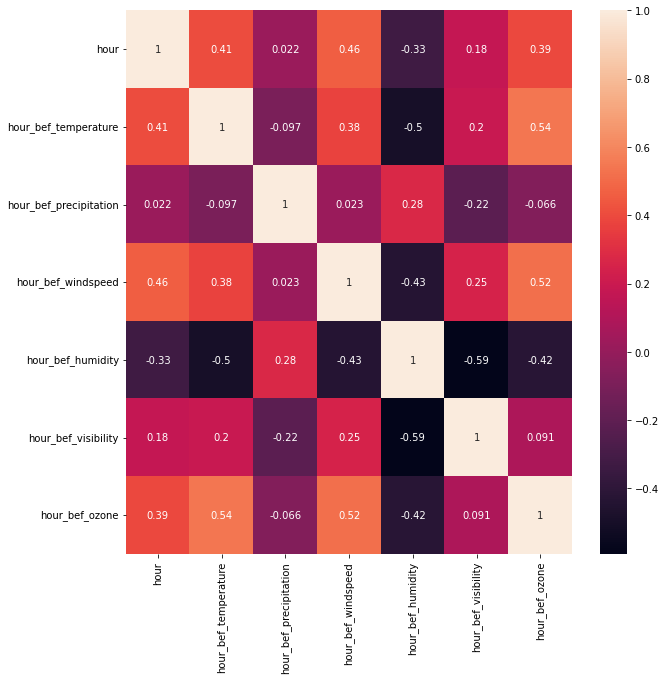

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_vif.corr(), annot=True)

한시간 전 온도가 다중공선성이 있는 걸로 보임. 상관관계를 통해 온도와 연관성있는 변수를 찾아본 결과, 습도와 오존,시간 세가지 변수가 존재한다. 이 세 변수를 통해서 온도를 설명할수 있는 걸로 보인다. 해당된 세 변수는 count와 어느 정도 상관성을 보이므로 변수 선택은 모델링에서 결정하도록 한다.

In [ ]:
test
# train.groupby(by='id').mean()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041000,44.0,27.00
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061000,49.0,36.00
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020000,36.0,28.00
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027000,52.0,38.00
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041000,18.0,15.00
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,0.023833,46.0,30.25
711,2149,1,18.1,0.0,1.0,55.0,2000.0,0.027000,30.0,20.25
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.0,15.00
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.0,26.00


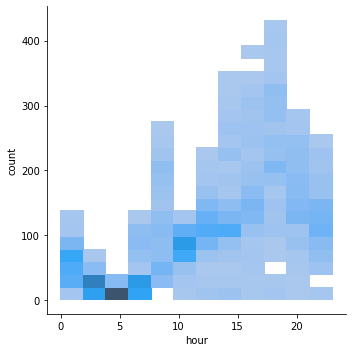

In [ ]:
# train.groupby(by='hour').mean()
# result =sm.tsa.seasonal_decompose(concat_df[target], model='additive')
# Y_seasonal = pd.DataFrame(result.seasonal)
sns.displot(data=train.sort_values(by='hour'), x=train.sort_values(by='hour')['hour'], y=train.sort_values(by='hour')['count'])

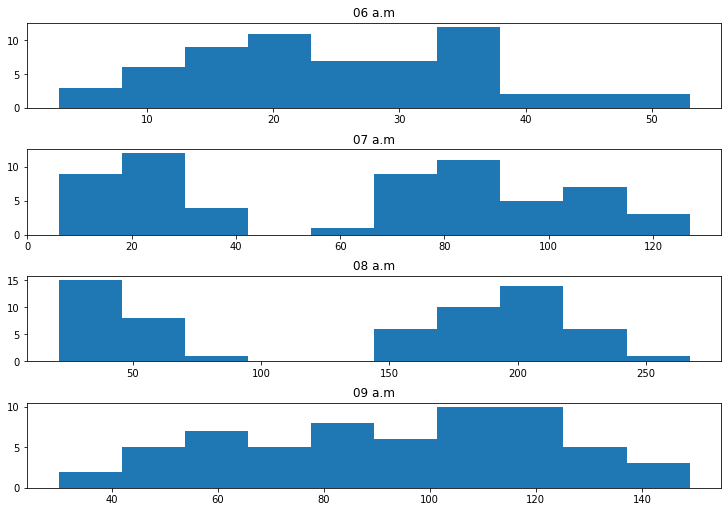

In [ ]:
#6시~10시까지 따릉이 수요
train_06=train.loc[train['hour']==6]['count']
train_07=train.loc[train['hour']==7]['count']
train_08=train.loc[train['hour']==8]['count']
train_09=train.loc[train['hour']==9]['count']

fig,ax = plt.subplots(4,1,figsize=(10, 7),constrained_layout=True)
ax[0].hist(train_06)
ax[1].hist(train_07)
ax[2].hist(train_08)
ax[3].hist(train_09)

ax[0].set_title('06 a.m')
ax[1].set_title('07 a.m')
ax[2].set_title('08 a.m')  #8시 구간에서 급증
ax[3].set_title('09 a.m')
plt.show()

### 파생변수 생성

#### 군집분석을 통한 날씨 데이터 잠재변수

In [ ]:
# # 스케일링/ log 변환 : 왜곡 현상 줄이기
# X_features = train.loc[:,['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]
# X_features_scaled = StandardScaler().fit_transform(X_features)
# X_features_log = np.log1p(X_features)

# X_features_test = test.loc[:,['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]
# X_features_test_scaled = StandardScaler().fit_transform(X_features_test)
# X_features_test_log = np.log1p(X_features_test)

#### KMeans

In [ ]:
# #Train

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples,silhouette_score

# recent_value = float('-inf')
# for i in range(2,5):
#   kmean = KMeans(n_clusters=i,random_state=2021)
#   kmean.fit(X_features_log)

#   #실루엣 평가
#   score_samples = silhouette_samples(X_features_log, kmean.labels_)

#   #실루엣 평균값
#   # np.mean(train['silhouette_coeff'].values)
#   print('n_clusters:',i,"평균값",np.mean(score_samples))
  

#   if recent_value < np.mean(score_samples):
#     recent_value = np.mean(score_samples)
#     train['cluster'] = kmean.labels_
# train['cluster']
# # predict
# # test['cluster'] = kmean.predict(test.loc[:,['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']].values)

In [ ]:
# #Test

# kmean_test_df = test.iloc[:,:-1].values
# kmean = KMeans(n_clusters=2 ,random_state=2021)
# kmean.fit(kmean_test_df)

# #실루엣 평가
# score_samples = silhouette_samples(kmean_test_df.data, kmean.labels_)
# test['cluster'] = kmean.labels_
# # train['silhouette_coeff'] = score_samples

# #실루엣 평균값
# # np.mean(train['silhouette_coeff'].values)
# np.mean(score_samples)

In [ ]:
# train.groupby(by='cluster')['silhouette_coeff'].mean()

In [ ]:
# import numpy as np
# train.groupby(by=['hour','id']).mean()
# train.groupby(by=['hour'])['hour_bef_temperature'].mean().plot()
# # train['hour_bef_temperature'].plot()

#### MeanShift

In [ ]:
# from sklearn.cluster import MeanShift
# from sklearn.cluster import estimate_bandwidth

# best_bandwidth = estimate_bandwidth(X_features_log)

# meanshift = MeanShift(bandwidth=best_bandwidth)
# cluster_labels= meanshift.fit_predict(X_features_log)
# train['cluster'] = cluster_labels 
# print('cluster labels 유형:',np.unique(cluster_labels))

#### GMM

In [ ]:
# # 1등 - 스케일
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components=2, random_state=2021).fit(X_features_scaled)
# gmm_cluster_labels = gmm.predict(X_features_scaled)

# train['cluster'] = gmm_cluster_labels
# print('gmm labels 유형:',np.unique(gmm_cluster_labels))

# gmm_test = GaussianMixture(n_components=2, random_state=2021).fit(X_features_test_scaled)
# gmm_cluster_test_labels = gmm.predict(X_features_test_scaled)

# test['cluster'] = gmm_cluster_test_labels

#### DSCAN

In [ ]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps = 0.4 , min_samples=12, metric='euclidean')
# dbscan_labels = dbscan.fit_predict(X_features_log)

# train['cluster'] = dbscan_labels
# print('dbscan labels 유형:',np.unique(dbscan_labels))

#### 시간별 평균 이용 수

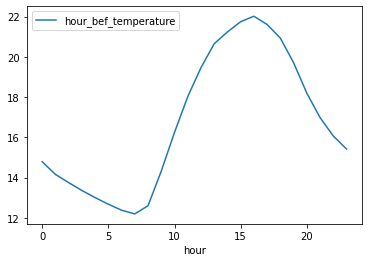

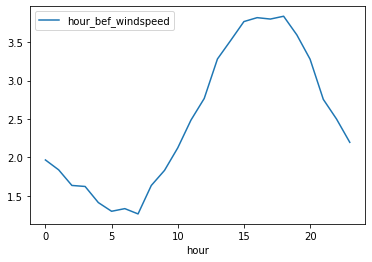

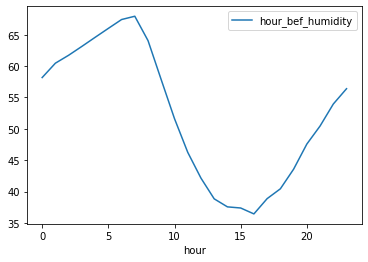

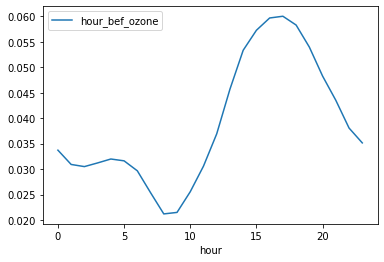

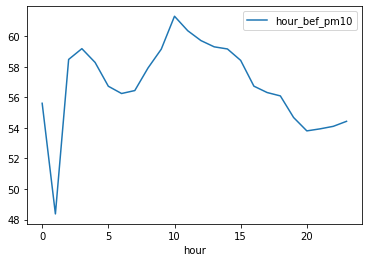

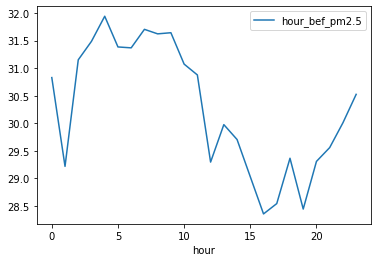

In [ ]:
colum=['hour_bef_temperature','hour_bef_windspeed','hour_bef_humidity','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']
for col in colum:
  train.groupby(by='hour').mean()[col].plot(label=col)
  plt.legend()
  plt.show()

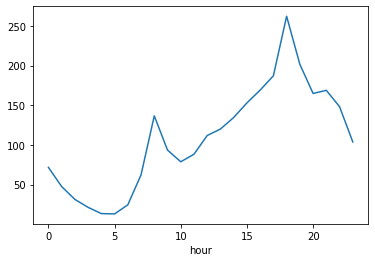

In [ ]:
train.groupby(by='hour').mean()['count'].plot()

출퇴근 시간에 급증하는 패턴을 설명해주는 변수가 마땅치 않다. 퇴근 시간에는 온도,풍속, 오존이 같은 시간대에 증가세를 보이는 반면 출근 시간의 증가패턴을 설명하는 변수가 없다. 따라서 해당 count의 패턴을 설명하는 변수를 생성하여 test 값에 적용시켜야 한다.

In [ ]:
# train
train.groupby('hour').mean().reset_index(drop=True)
# train

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,1200.016667,14.788136,0.016667,1.965517,58.169492,1434.220339,0.033719,55.606667,30.829167,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,0.030913,48.367213,29.217213,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.151639,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.487705,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,31.942623,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.385246,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029667,56.245902,31.368852,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025372,56.439344,31.704918,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.622951,136.688525
9,1076.524590,14.318033,0.016393,1.829508,57.803279,1189.098361,0.021492,59.147541,31.643443,93.540984


In [ ]:
train_df = train.copy()
test_df = test.copy()
train_df['cue'] = 0
test_df['cue'] = 1
df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

# 전체 데이터 중 train에 해당하는 행 추출
train_data = df.query('cue=="0"').reset_index(drop=True)

df['hour_mean']=1

#각 시간별 인덱스 추출
index00 = df.query('hour=="0"').index
index01 = df.query('hour=="1"').index
index02 = df.query('hour=="2"').index
index03 = df.query('hour=="3"').index
index04 = df.query('hour=="4"').index
index05 = df.query('hour=="5"').index
index06 = df.query('hour=="6"').index
index07 = df.query('hour=="7"').index
index08 = df.query('hour=="8"').index
index09 = df.query('hour=="9"').index
index10 = df.query('hour=="10"').index
index11 = df.query('hour=="11"').index
index12 = df.query('hour=="12"').index
index13 = df.query('hour=="13"').index
index14 = df.query('hour=="14"').index
index15 = df.query('hour=="15"').index
index16 = df.query('hour=="16"').index
index17 = df.query('hour=="17"').index
index18 = df.query('hour=="18"').index
index19 = df.query('hour=="19"').index
index20 = df.query('hour=="20"').index
index21 = df.query('hour=="21"').index
index22 = df.query('hour=="22"').index
index23 = df.query('hour=="23"').index

# 각 시간별 평균값을 "hourmean" 변수에 대입
df.iloc[index00,-1] = train_data.query('hour=="0"')['count'].mean()
df.iloc[index01,-1] = train_data.query('hour=="1"')['count'].mean()
df.iloc[index02,-1] = train_data.query('hour=="2"')['count'].mean()
df.iloc[index03,-1] = train_data.query('hour=="3"')['count'].mean()
df.iloc[index04,-1] = train_data.query('hour=="4"')['count'].mean()
df.iloc[index05,-1] = train_data.query('hour=="5"')['count'].mean()
df.iloc[index06,-1] = train_data.query('hour=="6"')['count'].mean()
df.iloc[index07,-1] = train_data.query('hour=="7"')['count'].mean()
df.iloc[index08,-1] = train_data.query('hour=="8"')['count'].mean()
df.iloc[index09,-1] = train_data.query('hour=="9"')['count'].mean()
df.iloc[index10,-1] = train_data.query('hour=="10"')['count'].mean()
df.iloc[index11,-1] = train_data.query('hour=="11"')['count'].mean()
df.iloc[index12,-1] = train_data.query('hour=="12"')['count'].mean()
df.iloc[index13,-1] = train_data.query('hour=="13"')['count'].mean()
df.iloc[index14,-1] = train_data.query('hour=="14"')['count'].mean()
df.iloc[index15,-1] = train_data.query('hour=="15"')['count'].mean()
df.iloc[index16,-1] = train_data.query('hour=="16"')['count'].mean()
df.iloc[index17,-1] = train_data.query('hour=="17"')['count'].mean()
df.iloc[index18,-1] = train_data.query('hour=="18"')['count'].mean()
df.iloc[index19,-1] = train_data.query('hour=="19"')['count'].mean()
df.iloc[index20,-1] = train_data.query('hour=="20"')['count'].mean()
df.iloc[index21,-1] = train_data.query('hour=="21"')['count'].mean()
df.iloc[index22,-1] = train_data.query('hour=="22"')['count'].mean()
df.iloc[index23,-1] = train_data.query('hour=="23"')['count'].mean()

In [ ]:
df.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,cue,hour_mean
2169,2148,1,24.6,0.0,2.4,60.0,1745.0,0.023833,46.0,30.25,NaN,1,47.606557
2170,2149,1,18.1,0.0,1.0,55.0,2000.0,0.027000,30.0,20.25,NaN,1,47.606557
2171,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.0,15.00,NaN,1,93.540984
2172,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.0,26.00,NaN,1,169.100000
2173,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007000,30.0,24.00,NaN,1,136.688525


#### hour_bef_precipitation에 따른 평균 이용 수

In [ ]:
df['precipitation_mean'] = 1
index0 = df.query('hour_bef_precipitation=="0.0"').index
index1 = df.query('hour_bef_precipitation=="1.0"').index

df.iloc[index0,-1] =train_data.query('hour_bef_precipitation=="0.0"')['count'].mean()
df.iloc[index1,-1] =train_data.query('hour_bef_precipitation=="1.0"')['count'].mean()

In [ ]:
df.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,cue,hour_mean,precipitation_mean
2169,2148,1,24.6,0.0,2.4,60.0,1745.0,0.023833,46.0,30.25,NaN,1,47.606557,111.001415
2170,2149,1,18.1,0.0,1.0,55.0,2000.0,0.027000,30.0,20.25,NaN,1,47.606557,111.001415
2171,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.0,15.00,NaN,1,93.540984,111.001415
2172,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.0,26.00,NaN,1,169.100000,111.001415
2173,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007000,30.0,24.00,NaN,1,136.688525,111.001415


### X_feature 왜곡 확인

In [ ]:
# 변수들의 왜곡 확인
from scipy.stats import skew
feature_df = df.drop(['id'	,'hour','count','cue','hour_bef_precipitation'], axis=1)
feature_index = feature_df.dtypes[feature_df.dtypes != 'object'].index 
feature_index = feature_df.dtypes[feature_df.dtypes != 'object'].index 
skew_features = feature_df[feature_index].apply(lambda x: skew(x))

#shew(왜곡) 저도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

hour_bef_pm10     2.645937
hour_bef_pm2.5    1.387923
dtype: float64


해당 변수는 사용않을 계획이기 때문에 별도의 log변환을 하지 않는다.

 ### target 이상치
 - count의 퇴근 시간대 분포를 보면 이상치가 존재한다. 이는 휴일,주말에 측정한 것으로 추측되므로 이를 제거한다
 - 2017년 5월 휴일은 석가탄신일, 어린이날, 19대 선거 3일이다. 시간별 count 이상치 갯수와 비슷하다
 - 휴일 변수는 test의 count값이 없기 때문에 만들지 못한다.

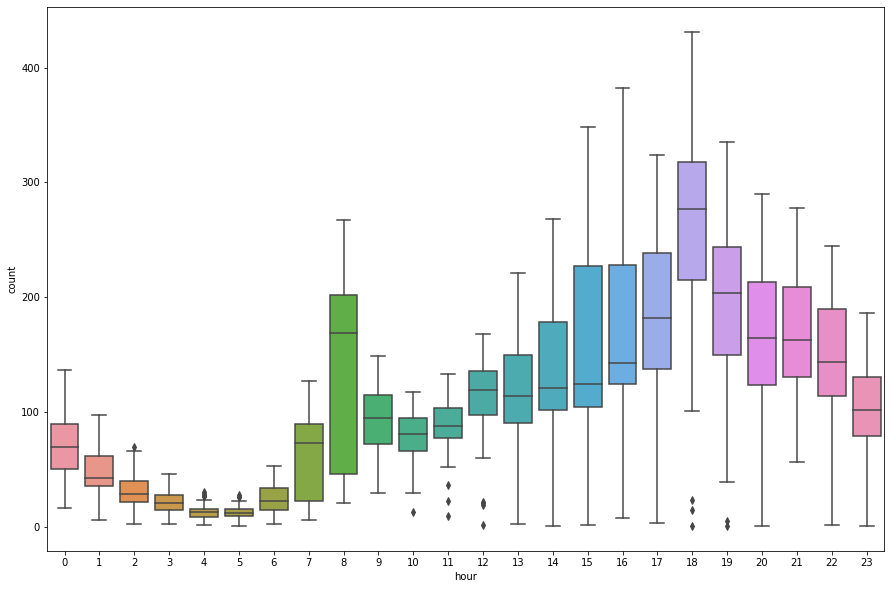

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='hour',y='count', data=train)
plt.show()

In [ ]:
#18시
train[train['hour']==18]['count']<100  # 19,1035,1113
# #19시
train[train['hour']==19]['count']<50  # 110, 306, 713

32      False
40      False
95      False
98      False
110      True
129     False
263     False
266     False
276     False
288     False
305     False
306      True
308     False
339     False
385     False
395     False
402     False
407     False
465     False
512     False
540     False
545     False
550     False
578     False
598     False
606     False
632     False
654     False
694     False
713      True
716     False
743     False
764     False
877     False
951     False
962     False
974     False
1002    False
1004    False
1032    False
1075    False
1082    False
1103    False
1116    False
1119    False
1126    False
1140    False
1153    False
1162    False
1164    False
1166    False
1215    False
1262    False
1293    False
1331    False
1338    False
1362    False
1370    False
1402    False
1426    False
1448    False
Name: count, dtype: bool

In [ ]:
del_index = [19,1035,1113,110,306,713]
df.drop(del_index, axis=0, inplace =True)

### 원핫인코딩 & 데이터 분리

In [ ]:
# 데이터 분리
x_train = df.query('cue=="0"').drop(['cue','count'], axis='columns')
test = df.query('cue=="1"').drop(['cue','count'],axis='columns')
y_train = df.query('cue=="0"')['count']

# target log
y_target_log = np.log1p(y_train)

# 원핫 인코딩
# x_train = pd.get_dummies(x_train, columns=['hour'])
# test = pd.get_dummies(test, columns=['hour'])

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=2021)

### feature Scaling
- X's 변수의 scaling

In [ ]:
def scaling(scaler,X_train,X_test,test):

  # train, valid data scaling
  scaler = scaler 
  scaler_fit = scaler.fit(X_train)  
  X_train = pd.DataFrame(scaler_fit.transform(X_train), index =X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler_fit.transform(X_test),index =X_test.index, columns=X_test.columns)

  # test data scaling
  test = pd.DataFrame(scaler_fit.transform(test),index =test.index, columns=test.columns)

  return X_train,X_test,test

X_train,X_test,test = scaling(StandardScaler(),X_train,X_test,test)

## 4. 모델 구축
  

In [ ]:
# 전체 변수
# x_columns = X_train.columns

# count와 상관관게 있는 변수만
# x_columns = [col for col in x_train.columns if col != "hour_bef_pm10" and col !="hour_bef_pm2.5" and col !="id"]

# xgb 피처 중요도
x_columns = ['hour_mean','hour_bef_temperature','hour_bef_precipitation']

# x_columns = ['hour','hour_bef_precipitation']
# x_columns

In [ ]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [ ]:
#그리드 서치
models = [
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    ('LogisticRegression', lm.LogisticRegression()),
    # ('SGDRegressor', lm.SGDRegressor()),
    ('xgboost', XGBRegressor()),
    ('lgb', lgb.LGBMRegressor()),
    ('knn', KNeighborsRegressor(n_jobs = -1) ),
    ('rf', RandomForestRegressor(n_jobs = -1)),
    ('dt',  DecisionTreeRegressor()),
    # ('ada', AdaBoostRegressor())
]

params = {
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01,0.1, 1.0, 10,100],
        'fit_intercept': [True, False],
    },
    # 'SGDRegressor': {
    #     'penalty': ['l1', 'l2'],
    #     'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
    #     'fit_intercept': [True, False],
    # },
    'xgboost': {
        "gamma": np.linspace(0,0.5,50),
        "max_depth": range(2, 7), 
        "n_estimators": [100,200,300] 
    },
    'lgb': {
        "gamma": np.linspace(0,0.5,50)+[0.341],
        "max_depth": range(2, 7), 
        "n_estimators": [100,200,300,400] 
    },
    'knn': {
        "n_neighbors": range(2,7),
        },
    'rf': {
        "max_depth": range(2, 5),
        "min_samples_split": range(2, 5),
        "min_samples_leaf": range(2, 5), 
        "n_estimators": [100,200,300],
        },
    'dt': {
        "max_depth": range(2, 5),
        "min_samples_split": range(2, 5),
        "min_samples_leaf": range(2, 5), 
        },
    # 'ada': {
    #     "n_estimators": [40,50,60]
    # }
}

best_model, best_score = None, float('inf')
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=kfold, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train[x_columns], Y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test[x_columns])

    score = evaluate(Y_test, predictions)['mse'][0]
    print(model_name, score)

    if score < best_score:
        best_score=score
        best_model = model

    # ## expm1로 변환
    # y_test_exp = np.expm1(y_test)
    # predictions_exp = np.expm1(predictions)
    # score_exp = evaluate(y_test_exp, predictions_exp)['mae'][0]
    # print(model_name, score_exp)

    # if score_exp < best_score:
    #   best_score=score_exp
    #   best_model = model

ridge 1792.492041133822
lasso 1791.5277415356115
elastic 1820.4101812961349
LassoLars 1791.5272526133288
LogisticRegression 6268.908256880734
[11:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 1544.2674034695967
lgb 1489.6300890980265
knn 1733.4388379204893
rf 1584.2857701783096
dt 1753.763307044564
ada 1927.4951397174343


In [ ]:
evaluate(Y_test, predictions)

,mape,mae,mse
score,113.028375,36.038356,2127.489808


In [ ]:
best_model.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              gamma=0.341, importance_type='split', learning_rate=0.1,
              max_depth=3, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)>

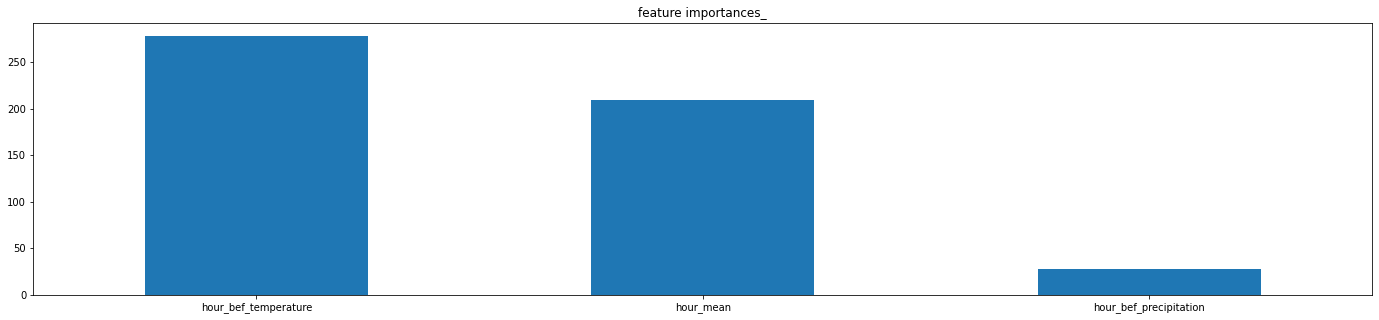

In [ ]:
feature_importance = pd.Series(index=x_train[x_columns].columns, data=best_model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="feature importances_", rot=0)
plt.show()

### Grid Best model predict

In [ ]:
best_pred = best_model.predict(test[x_columns])
submission.iloc[:,1] = best_pred
submission.set_index("id")
submission.to_csv('lgb_model_cv5_pred_selected.csv', index=False)

### CV 스태킹

In [ ]:
#보류 -> 그리드 서치를 통해 결정하기
#개별 model 생성
knn=KNeighborsRegressor(n_jobs = -1)
rf = RandomForestRegressor(n_jobs = -1, random_state=2021)
dt = DecisionTreeRegressor(random_state=2021)
xgb = XGBRegressor(verbosity = 0, random_state=2021)
ada = AdaBoostRegressor(random_state=2021)
ridge=lm.Ridge()
lasso=lm.Lasso()
final = lm.Ridge()
lgb_reg=lgb.LGBMRegressor()

In [ ]:
def print_best_params(model, params):
  best_model, best_score = None, float('inf')
  grid_model = GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X_train,Y_train)
  # predictions = grid_model.predict(X_test)
  # score = evaluate(Y_test, predictions)['mse'][0]
  print("model name is {0},Grid best score:{1}, Grid best_params_:{2} ".format(model.__class__.__name__,grid_model.best_score_,grid_model.best_params_))

In [ ]:
#param 설정
knn_params ={"n_neighbors": range(2,7)}
rf_params={"max_depth": range(2, 5),"min_samples_split": range(2, 5),"min_samples_leaf": range(2, 5), "n_estimators": [100,200,300]}
dt_params={"max_depth": range(2, 5),"min_samples_split": range(2, 5),"min_samples_leaf": range(2, 5)}
xgb_params={"gamma": uniform(0, 0.5).rvs(3),"max_depth": range(2, 7), "n_estimators": [100,200,300]}
ada_params={"n_estimators": [40,50,60]}
lgb_params={"gamma": uniform(0, 0.5).rvs(3),"max_depth": range(2, 7), "n_estimators": [100,200,300,400]}
Ridge_params={'alpha': [0.01, 0.1, 1.0, 10, 100],'fit_intercept': [True, False],'normalize': [True, False]}
lasso_params={'alpha': [0.1, 1.0, 10],'fit_intercept': [True, False],'normalize': [True, False]}

In [ ]:
print_best_params(knn,knn_params)
print_best_params(rf,rf_params)
print_best_params(dt,dt_params)
print_best_params(ada,ada_params)
print_best_params(xgb,xgb_params)
print_best_params(lgb_reg,lgb_params)
print_best_params(ridge,Ridge_params)
print_best_params(lasso,lasso_params)

model name is KNeighborsRegressor,Grid best score:-3458.5501989157733, Grid best_params_:{'n_neighbors': 4} 
model name is RandomForestRegressor,Grid best score:-1715.3496565899343, Grid best_params_:{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100} 
model name is DecisionTreeRegressor,Grid best score:-2033.204198431899, Grid best_params_:{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2} 
model name is AdaBoostRegressor,Grid best score:-2149.0152774244843, Grid best_params_:{'n_estimators': 40} 
model name is XGBRegressor,Grid best score:-1477.5776373356193, Grid best_params_:{'gamma': 0.12889993895241564, 'max_depth': 4, 'n_estimators': 100} 
model name is LGBMRegressor,Grid best score:-1524.0959447354717, Grid best_params_:{'gamma': 0.273931886786571, 'max_depth': 6, 'n_estimators': 100} 
model name is Ridge,Grid best score:-1751.7217163613059, Grid best_params_:{'alpha': 0.1, 'fit_intercept': True, 'normalize': False} 
model name is L

In [ ]:
knn=KNeighborsRegressor(n_jobs = -1)
rf = RandomForestRegressor(max_depth= 4, min_samples_leaf= 2, min_samples_split= 2,n_jobs = -1, random_state=2021)
dt = DecisionTreeRegressor(max_depth= 4, min_samples_leaf= 4, min_samples_split= 2,random_state=2021)
xgb = XGBRegressor(gamma= 0.25883224322873616, max_depth= 4, n_estimators= 100, verbosity = 0, random_state=2021)
ada = AdaBoostRegressor(n_estimators= 40,random_state=2021)
ridge=lm.Ridge(alpha= 0.01, fit_intercept= True, normalize= True)
lasso=lm.Lasso(alpha= 1.0, fit_intercept= True, normalize= False)

#최종 메타 모델
lgb_reg=lgb.LGBMRegressor(gamma= 0.08826298344672961, max_depth= 4)

In [ ]:
def get_stacking_base_datasets(model, x_train, y_train, test, n_folds):
 
  # 지정된 n_folds 값으로 kFold 생성
  kf = KFold(n_splits=n_folds, shuffle=False , random_state=2021)
  #추후에 메타 모델이 사용할 학습 데잍 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((x_train.shape[0],1)) #(1459,1)
  test_fold_pred = np.zeros((test.shape[0],n_folds)) #(715,5)
  print(model.__class__.__name__,"model 시작")

  for folder_counter,(train_index,valid_index) in enumerate(kf.split(x_train)):
    # print('train_index:',train_index,'valid_index:',valid_index)
    # print('valid 갯수:',len(valid_index))
    # print('\t 폴드 세트:', folder_counter,"시작")

    #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드데이터 세트 추출
    x_tr = x_train[train_index]
    y_tr = y_train[train_index]
    x_te = x_train[valid_index]
    
    #폴드 세트 내부에서 다시 만들어진 학습데이터로 기반 모델의 학습 수행
    model.fit(x_tr,y_tr)
    
    #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
    train_fold_pred[valid_index,:]=model.predict(x_te).reshape(-1,1)
    
    #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_fold_pred[:,folder_counter]=model.predict(test)

  #폴드 세트 내에서 원본테스트 데이터르 예측한데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_fold_pred, axis =1).reshape(-1,1)

  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [ ]:
x_train_n=x_train.values
y_train_n=y_train.values
test_n=test.values
n_fold=5

knn_train,knn_test = get_stacking_base_datasets(knn,x_train_n,y_train_n,test_n,n_fold)
rf_train,rf_test = get_stacking_base_datasets(rf,x_train_n,y_train_n,test_n,n_fold)
xgb_train,xgb_test = get_stacking_base_datasets(xgb,x_train_n,y_train_n,test_n,n_fold)
# df_train,df_test = get_stacking_base_datasets(df,x_train_n,y_train_n,test_n,n_fold)
ada_train,ada_test = get_stacking_base_datasets(ada,x_train_n,y_train_n,test_n,n_fold)

KNeighborsRegressor model 시작
RandomForestRegressor model 시작
XGBRegressor model 시작
AdaBoostRegressor model 시작


In [ ]:
stack_final_x_train=np.concatenate((knn_train,rf_train,xgb_train,ada_train),axis=1)
stack_final_x_test=np.concatenate((knn_test,rf_test,xgb_test,ada_test), axis=1)

# print('원본 학습 피처 데이터 shape:', x_train.shape, '원본 테스트 피처 shape:',x_test.shape)
# print('스태킹 학습 피처 데이터 shape:', stack_final_x_train.shape, '스태킹 테스트 피처 데이터 shape:',stack_final_x_test.shape)

In [ ]:
stack_final_x_test.shape

(715, 4)

In [ ]:
lgb_reg.fit(stack_final_x_train,y_train) #원본 학습 label과 fit
stack_final=lgb_reg.predict(stack_final_x_test)
# evaluate(Y_test, stack_final)

In [ ]:
submission.iloc[:,1] = stack_final
submission.set_index("id")
submission.to_csv('lgb_stacking_all_optimize.csv', index=False)